In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from scipy.optimize import minimize

In [66]:
df = pd.read_csv("S499.csv")

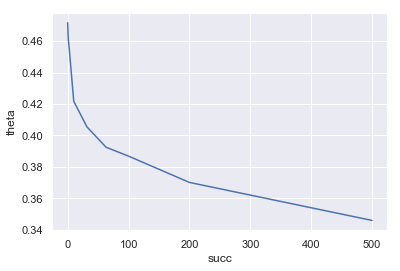

In [67]:
ax = sns.lineplot(x="succ", y="theta", data=df)

In [87]:
psi = np.asarray(df["succ"])
theta = np.asarray(df["theta"])

theta

array([0.47168963, 0.46150389, 0.45551228, 0.42175954, 0.40548232,
       0.3925005 , 0.3868584 , 0.37013181, 0.34596565])

In [88]:

# def psiPred(p):
#     w_sat = 0.472*100
#     a = p[0]
#     n = p[1]
#     psiPred = (1./a) * ((w_sat/theta)**(n/(n-2.))-1.)**(1./n)
#     return psiPred 

def psiPred(p):
    w_sat = 0.472
    a = p[0]
    m = p[1]
    n = p[2]
    
    psiPred = (1./a) * (((w_sat/theta)**(1./m))-1.)**(1./n)
    return psiPred 

def objective(p):
    sse = sum((psiPred(p)-psi)**2.)
    return sse


In [89]:
p0 = [2., 1000., 100000.]
print(psiPred(p0))

[0.49992883 0.49994649 0.49994878 0.49995454 0.49995604 0.49995701
 0.49995739 0.49995839 0.49995962]


SSE Initial: 304181.5445898792
[9.90861863e-03 1.00000000e+03 1.00000000e+05]
SSE Final: 213437.45686148416


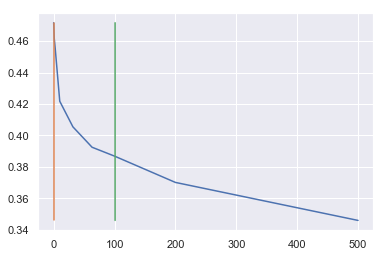

In [90]:
print("SSE Initial: " + str(objective(p0)))

solution = minimize(objective, p0)
p = solution.x

print(p)
print("SSE Final: " + str(objective(p)))

plt.plot(psi, theta)
plt.plot(psiPred(p0), theta)
plt.plot(psiPred(p), theta)

In [91]:
solution

      fun: 213437.45686148416
 hess_inv: array([[0.00445244, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])
      jac: array([4.84960938, 0.        , 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 367
      nit: 1
     njev: 71
   status: 2
  success: False
        x: array([9.90861863e-03, 1.00000000e+03, 1.00000000e+05])